# ALL

## Download dataset

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1NQtY1BBVQy0h43hblIF9H6cJigtVdzSm

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From (uriginal): https://drive.google.com/uc?id=1NQtY1BBVQy0h43hblIF9H6cJigtVdzSm
From (redirected): https://drive.google.com/uc?id=1NQtY1BBVQy0h43hblIF9H6cJigtVdzSm&confirm=t&uuid=2220646e-2dc2-478f-a43e-182ef70fd6e9
To: /content/EuroSATallBands.zip
100% 2.07G/2.07G [00:27<00:00, 74.0MB/s]


In [2]:
import zipfile
zip_file_path = '/content/EuroSATallBands.zip'
folder_path = '/content/EuroSAT'
# Extract the zip file to the specified folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(folder_path)

## import library

In [3]:
!pip install rasterio
import os
import rasterio
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sn
import pandas as pd
from IPython.display import clear_output
import torch
from torch.nn import Conv2d, Linear
import torchvision.models as models
from torchsummary import summary
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import DataLoader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 55.3 MB/s eta 0:00:00


## see samples

In [5]:
# Import necessary libraries
import os
import glob
import rasterio

# Define the path to the directory containing the raster data
datapath = "/content/EuroSAT/ds/images/remote_sensing/otherDatasets/sentinel_2/tif"

# Find all the TIFF files in the directory and its subdirectories
path_to_tiffs = glob.glob(os.path.join(datapath, "**", "*.tif"), recursive=True)

# Choose the first TIFF file as an example
tiff_file = path_to_tiffs[0]

# Open the TIFF file in read-only mode using Rasterio
with rasterio.open(tiff_file, "r") as src:

    # Read the data from the specified bands (2, 3, 4, 8) and store it in a variable (we will only work with the four 10m channels)
    tempdata = src.read((2, 3, 4, 8))

    # Print the shape of the data array
    print("Shape of the data array:", tempdata.shape)

Shape of the data array: (4, 64, 64)


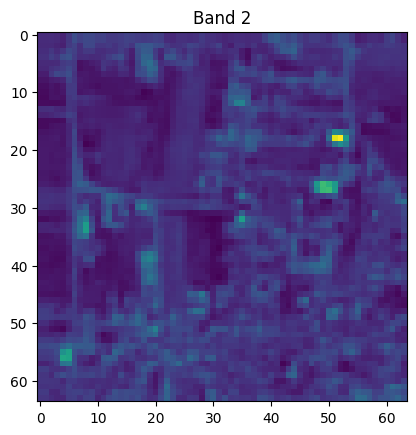

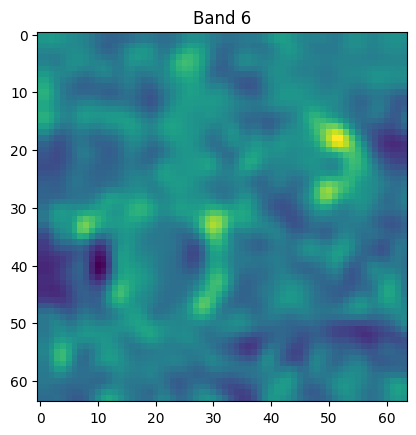

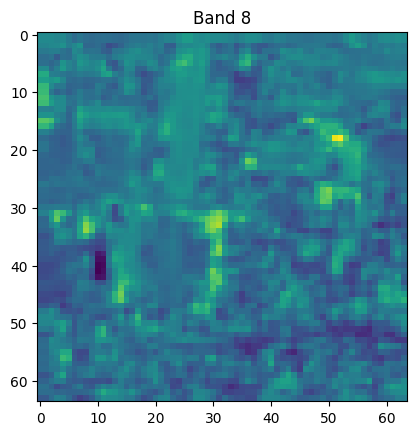

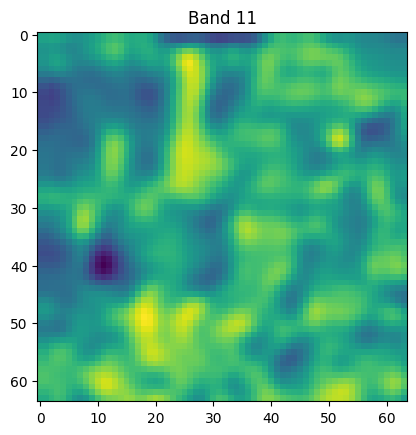

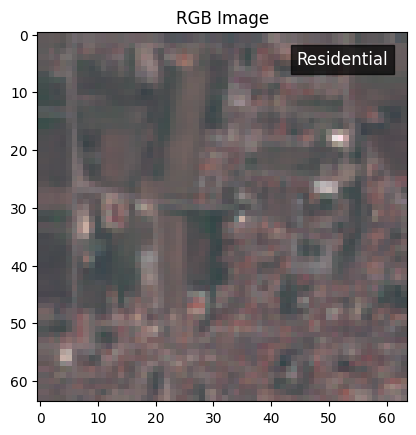

In [6]:
import rasterio
import glob
import os
import matplotlib.pyplot as plt

# Define the path to the directory containing the data
datapath = "/content/EuroSAT/ds/images/remote_sensing/otherDatasets/sentinel_2/tif"

# Find all TIFF files in the directory and subdirectories
path_to_preview = glob.glob(os.path.join(datapath,"**","*.tif"),recursive=True)

# Read in the specified bands from the first TIFF file
with rasterio.open(path_to_preview[7520],"r") as src:
    # Note that band numbering in rasterio starts at 1, not 0
    band_nums = [2, 6, 8, 11]
    tempdata = src.read(band_nums)

# Plot each band separately and save as a PDF file
for i, band in enumerate(tempdata, start=1):
    # Get the band number from the source file
    with rasterio.open(path_to_preview[7520],"r") as src:
        band_num = src.indexes[band_nums[i-1]-1]

    # Plot the band and set the title to the band number
    plt.imshow(band)
    plt.title("Band {}".format(band_num))

    # Save the plot as a PDF file with the band number in the filename
    plt.savefig("band{}.pdf".format(band_num))

    # Show the plot in the notebook
    plt.show()

# Display and save the RGB image
with rasterio.open(path_to_preview[7520],"r") as src:
    # Read in the red, green, and blue bands
    rgb = src.read([4,3,2])

    # Normalize the bands to values between 0 and 1
    rgb = rgb / rgb.max()

    # Display the RGB image
    fig, ax = plt.subplots()
    im = ax.imshow(rgb.transpose(1,2,0))
    plt.title("RGB Image")

    # Get the class name from the file path and add it as a legend on the top right corner
    class_name = os.path.basename(os.path.dirname(path_to_preview[7520]))
    ax.text(0.95, 0.95, class_name, transform=ax.transAxes, ha='right', va='top', color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.7, pad=4))

    # Save the RGB image as a PDF file
    plt.savefig("rgb.pdf")

    # Show the plot in the notebook
    plt.show()

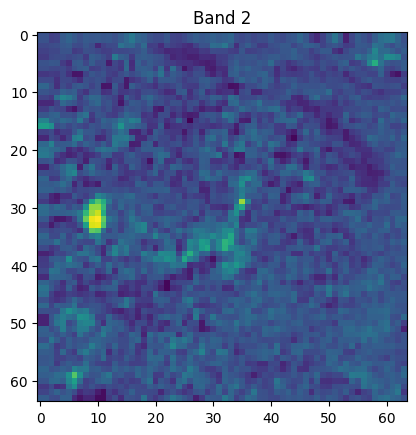

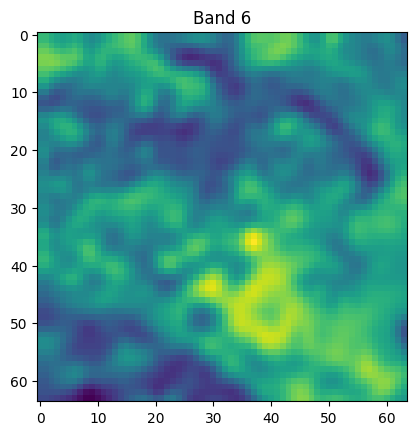

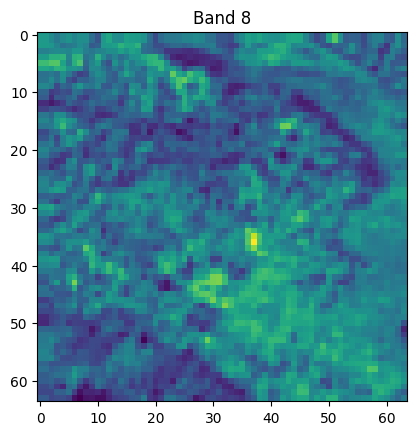

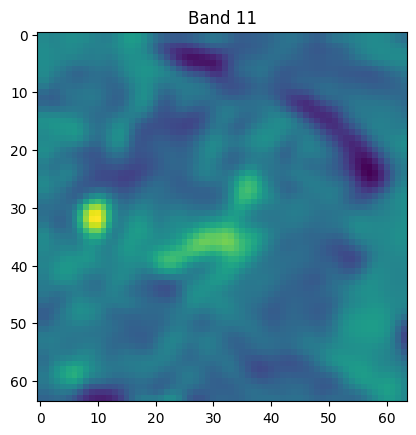

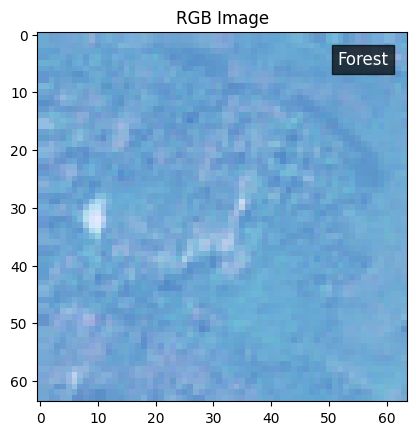

In [7]:
import rasterio
import glob
import os
import matplotlib.pyplot as plt

# Define the path to the directory containing the data
datapath = "/content/EuroSAT/ds/images/remote_sensing/otherDatasets/sentinel_2/tif"

# Find all TIFF files in the directory and subdirectories
path_to_preview = glob.glob(os.path.join(datapath,"**","*.tif"),recursive=True)

# Read in the specified bands from the first TIFF file
with rasterio.open(path_to_preview[0],"r") as src:
    # Note that band numbering in rasterio starts at 1, not 0
    band_nums = [2, 6, 8, 11]
    tempdata = src.read(band_nums)

# Plot each band separately and save as a PDF file
for i, band in enumerate(tempdata, start=1):
    # Get the band number from the source file
    with rasterio.open(path_to_preview[0],"r") as src:
        band_num = src.indexes[band_nums[i-1]-1]

    # Plot the band and set the title to the band number
    plt.imshow(band)
    plt.title("Band {}".format(band_num))

    # Save the plot as a PDF file with the band number in the filename
    plt.savefig("band{}.pdf".format(band_num))

    # Show the plot in the notebook
    plt.show()

# Display and save the RGB image
with rasterio.open(path_to_preview[0],"r") as src:
    # Read in the red, green, and blue bands
    rgb = src.read([4,3,2])

    # Normalize the bands to values between 0 and 1
    rgb = rgb / rgb.max()

    # Display the RGB image
    fig, ax = plt.subplots()
    im = ax.imshow(rgb.transpose(1,2,0))
    plt.title("RGB Image")

    # Get the class name from the file path and add it as a legend on the top right corner
    class_name = os.path.basename(os.path.dirname(path_to_preview[0]))
    ax.text(0.95, 0.95, class_name, transform=ax.transAxes, ha='right', va='top', color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.7, pad=4))

    # Save the RGB image as a PDF file
    plt.savefig("rgb.pdf")

    # Show the plot in the notebook
    plt.show()

## prepared data

In [ ]:
datapath = "/content/EuroSAT/ds/images/remote_sensing/otherDatasets/sentinel_2/tif"
# Model and Trainings Parameters
batch_size = 16
threads = 6
learning_rate = 0.001
momentum = 0.9

In [8]:
import os

# Get list of class names in alphabetical order
classes = (os.listdir(datapath))

# Print list of classes
print(classes)

# Check that the list of classes is not empty
assert len(classes) > 0

# Check that each class name is valid (for example, does not contain whitespace)
for class_name in classes:
    assert class_name.strip() == class_name

['Forest', 'SeaLake', 'Residential', 'PermanentCrop', 'Highway', 'River', 'AnnualCrop', 'Pasture', 'HerbaceousVegetation', 'Industrial']


In [9]:
classes = os.listdir(datapath)
print(classes)

['Forest', 'SeaLake', 'Residential', 'PermanentCrop', 'Highway', 'River', 'AnnualCrop', 'Pasture', 'HerbaceousVegetation', 'Industrial']


In [10]:
RS = np.random.RandomState(seed=69422)

# make sure you set the path correctly
classes = os.listdir(datapath)
print(classes)
# assert classes == ['HerbaceousVegetation', 'Industrial', 'Pasture', 'River', 'AnnualCrop', 'Highway', 'Residential', 'Forest', 'SeaLake', 'PermanentCrop']


['Forest', 'SeaLake', 'Residential', 'PermanentCrop', 'Highway', 'River', 'AnnualCrop', 'Pasture', 'HerbaceousVegetation', 'Industrial']


In [11]:
import torch
import torch.nn as nn
from torchsummary import summary

# Load the pre-trained VGG-16 model
model = models.vgg16(pretrained=True)

# Move the model to the GPU
model.cuda()

# Print the model summary
summary(model, input_size=(3, 64, 64))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 87.8MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,792
              ReLU-2           [-1, 64, 64, 64]               0
            Conv2d-3           [-1, 64, 64, 64]          36,928
              ReLU-4           [-1, 64, 64, 64]               0
         MaxPool2d-5           [-1, 64, 32, 32]               0
            Conv2d-6          [-1, 128, 32, 32]          73,856
              ReLU-7          [-1, 128, 32, 32]               0
            Conv2d-8          [-1, 128, 32, 32]         147,584
              ReLU-9          [-1, 128, 32, 32]               0
        MaxPool2d-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 256, 16, 16]         295,168
             ReLU-12          [-1, 256, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         590,080
             ReLU-14          [-1, 256,

In [12]:
import torch
import torch.nn as nn
from torchsummary import summary

# Load the pre-trained VGG-16 model
model = models.vgg16(pretrained=True)

# Modify the first convolutional layer to accept 4 channels instead of 3
model.features[0] = nn.Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

# Modify the last fully connected layer to output 10 classes instead of 1000
model.classifier[-1] = nn.Linear(in_features=4096, out_features=10, bias=True)

# Move the model to the GPU
model.cuda()

# Print the model summary
summary(model, input_size=(4, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           2,368
              ReLU-2           [-1, 64, 64, 64]               0
            Conv2d-3           [-1, 64, 64, 64]          36,928
              ReLU-4           [-1, 64, 64, 64]               0
         MaxPool2d-5           [-1, 64, 32, 32]               0
            Conv2d-6          [-1, 128, 32, 32]          73,856
              ReLU-7          [-1, 128, 32, 32]               0
            Conv2d-8          [-1, 128, 32, 32]         147,584
              ReLU-9          [-1, 128, 32, 32]               0
        MaxPool2d-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 256, 16, 16]         295,168
             ReLU-12          [-1, 256, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         590,080
             ReLU-14          [-1, 256,

In [13]:
def get_list_of_samples(datapath):

    sample_toupels = [] # a list to hold sample-tuples

    # Loop over each class in the dataset
    for ijk, _class in enumerate(classes):

        # Get a list of all sample files for the current class
        all_samples_in_class = glob.glob(os.path.join(datapath,_class,"*.tif"))

        # Limit the number of samples to 2000 per class to create a balanced dataset
        all_samples_in_class = all_samples_in_class[:2000]

        # Create a dictionary for each sample that includes the file path and class label
        for sample in all_samples_in_class:
            sample_toupels.append({"X":sample,"Y":ijk})

    # Return the list of dictionaries containing the image file paths and class labels
    return sample_toupels

## data disturbution

# Train Images 15200
# Val Images 2400
# Test Images 2400


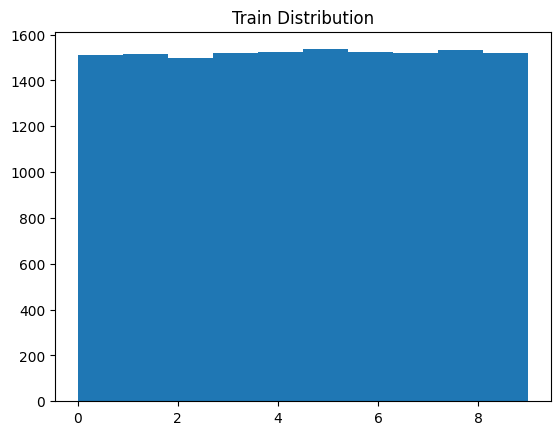

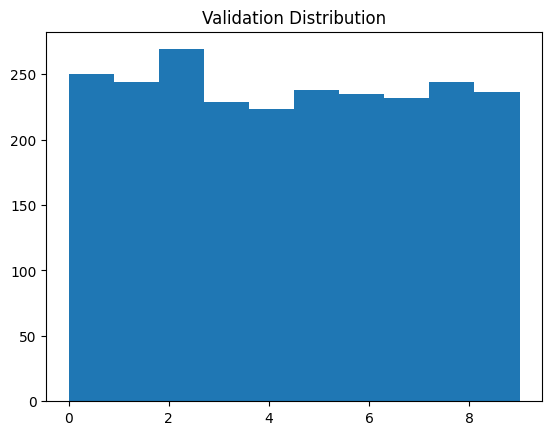

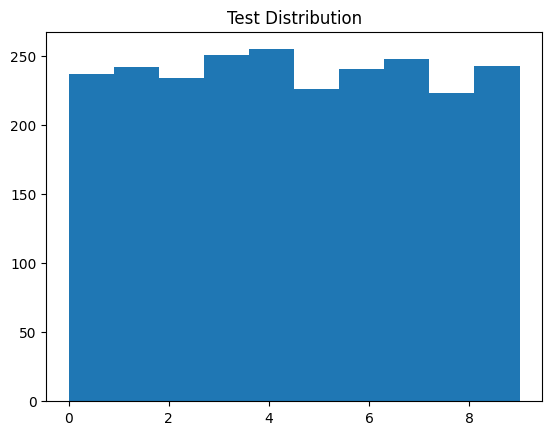

In [14]:
import random as RS
import matplotlib.pyplot as plt

# Define a function to get a list of samples from a given datapath
# def get_list_of_samples(datapath):
#     # Code to get a list of samples from the datapath
#     pass

# Get a list of all samples from the datapath
all_samples = get_list_of_samples(datapath)

# Shuffle the samples randomly
RS.shuffle(all_samples)

# Define the ratios for train, validation, and test sets
train_ratio = 0.76
val_ratio = 0.12
test_ratio = 0.12

# Calculate the number of samples for each set based on the ratios
num_samples = len(all_samples)
num_train = int(num_samples * train_ratio)
num_val = int(num_samples * val_ratio)
num_test = num_samples - num_train - num_val

# Split the shuffled samples into train, validation, and test sets
train_locations = all_samples[:num_train]
val_locations = all_samples[num_train:num_train+num_val]
test_locations = all_samples[num_train+num_val:]

# Print the number of samples in each set
print("# Train Images", len(train_locations))
print("# Val Images", len(val_locations))
print("# Test Images", len(test_locations))

# Plot the distribution of the Y values for the train set and save as a PDF
temp_hist = []
for d in train_locations:
    temp_hist.append(d["Y"])
plt.hist(temp_hist)
plt.title("Train Distribution")
plt.savefig("traindistribution.pdf")
plt.show()

# Plot the distribution of the Y values for the validation set and save as a PDF
temp_hist = []
for d in val_locations:
    temp_hist.append(d["Y"])
plt.hist(temp_hist)
plt.title("Validation Distribution")
plt.savefig("validationdistribution.pdf")
plt.show()

# Plot the distribution of the Y values for the test set and save as a PDF
temp_hist = []
for d in test_locations:
    temp_hist.append(d["Y"])
plt.hist(temp_hist)
plt.title("Test Distribution")
plt.savefig("testdistribution.pdf")
plt.show()

## train

In [15]:
import rasterio
import numpy as np
import torch
from torch.utils import data
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

# Define a dataset class for the Super Resolution (SR) model
class class_dataset(data.Dataset):

    # Constructor to initialize the samplelist for the dataset
    def __init__(self, samplelist):
        self.samplelist = samplelist

    # Method to get the data and label tensors for a given index
    def __getitem__(self, i):

        # Open the image file using rasterio
        with rasterio.open(self.samplelist[i]["X"], "r") as src:

            # Read the data from bands 2, 3, 4, and 8 as a float32 array
            data = src.read((2,3,4,8)).astype("float32")

            # Normalize the data to [0,1] range
            data = data / 10000

            # Clip the data to [0,1] range
            data = np.clip(data, 0, 1)

        # Return the data tensor and the label tensor as a tuple
        return torch.Tensor(data), torch.Tensor([self.samplelist[i]["Y"]]).long()

    # Method to get the length of the dataset
    def __len__(self):
        return len(self.samplelist)

# Create datasets and dataloaders for train, validation, and test sets
train_set = class_dataset(train_locations)
val_set = class_dataset(val_locations)
test_set = class_dataset(test_locations)

# Setup the dataloader with the given number of worker threads, batch size, and shuffle option
training_data_loader = DataLoader(dataset=train_set, num_workers=threads, batch_size=batch_size, shuffle=True, drop_last=True)
val_data_loader = DataLoader(dataset=val_set, num_workers=threads, batch_size=batch_size, shuffle=True, drop_last=True)
test_data_loader = DataLoader(dataset=test_set, num_workers=threads, batch_size=batch_size, shuffle=True, drop_last=True)

torch.Size([16, 4, 64, 64]) torch.Size([16, 1])


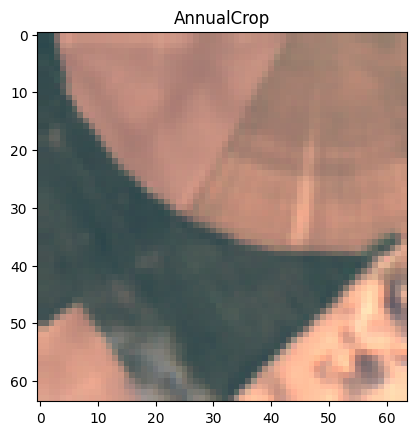

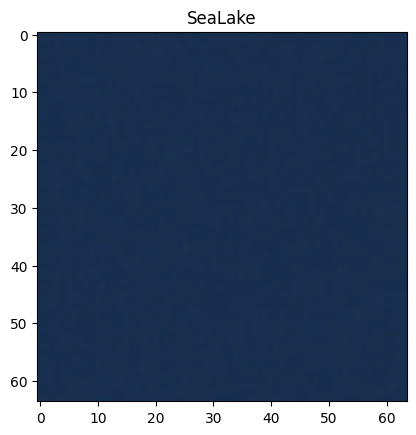

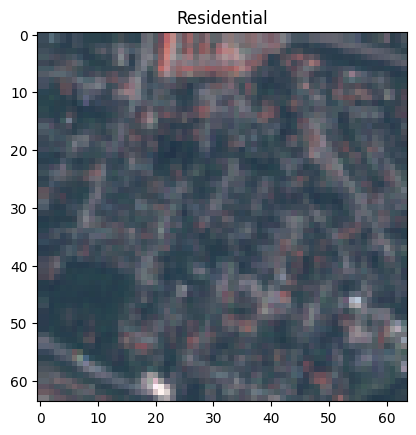

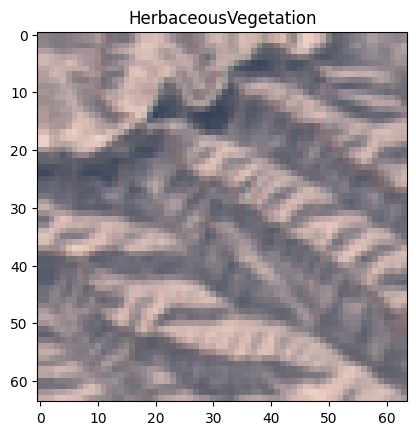

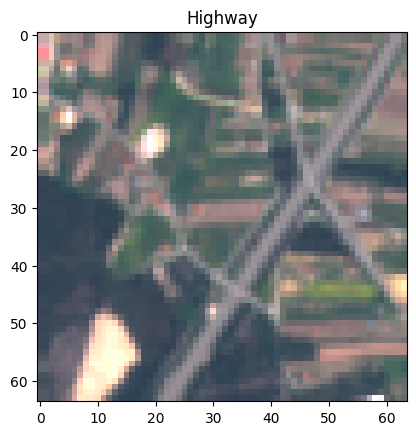

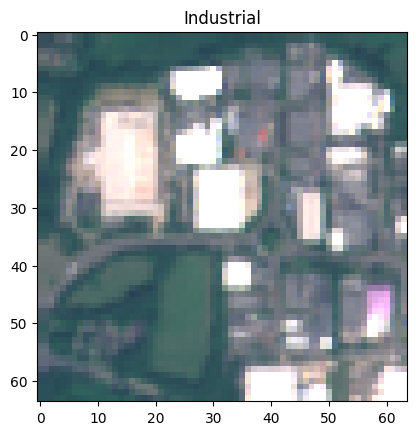

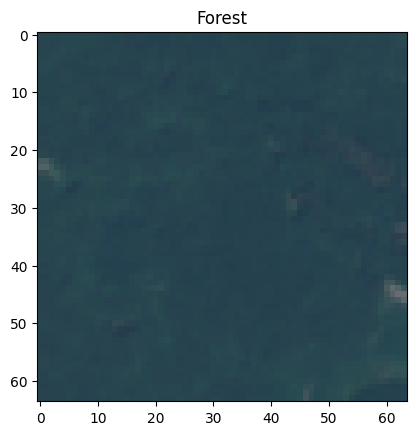

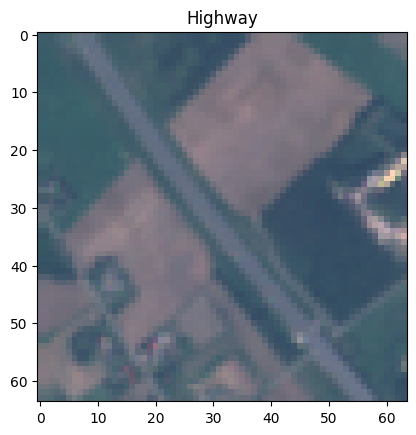

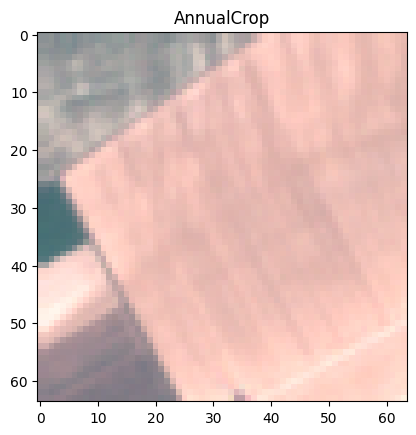

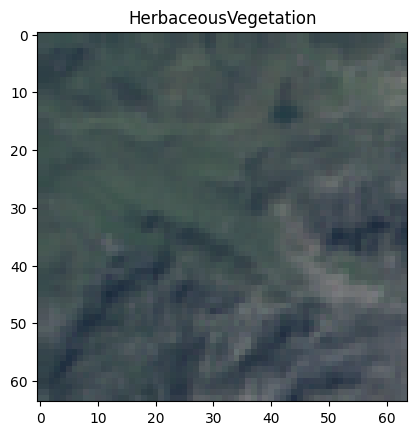

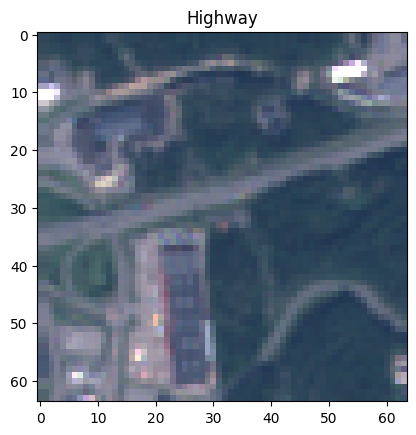

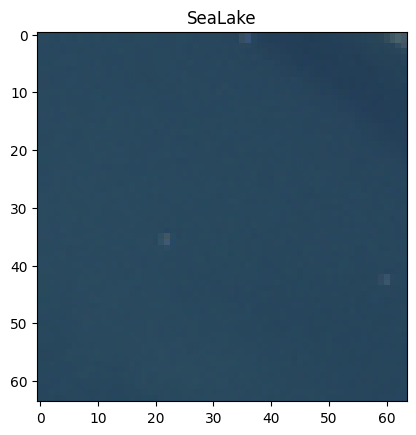

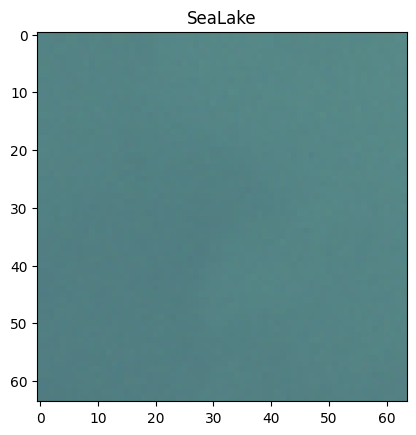

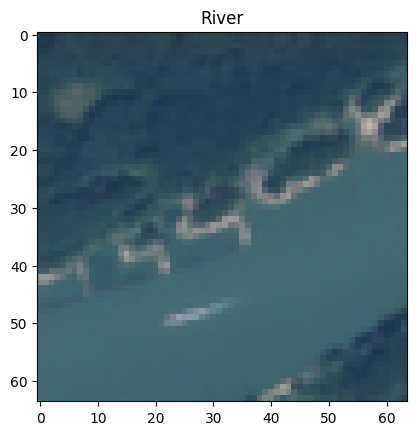

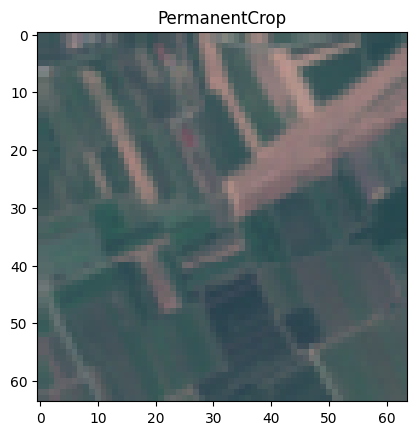

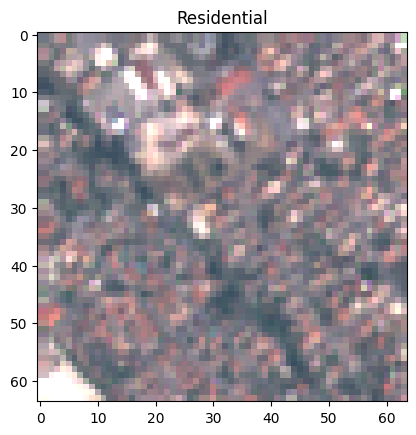

In [16]:
# Loop over the first batch of images and their corresponding labels
for img, label in val_data_loader:
    # Only process the first batch
    break

# Print the shape of the first image and its label
print(img.shape,label.shape)

# Loop over each image in the batch
for batchindex in range(batch_size):

    # Extract the B, G, R color channels from the image
    B,G,R = img[batchindex,:3,:,:]
    # Stack the channels to form a colored image
    plot_img = np.stack([R,G,B],axis=-1)
    # Increase the brightness of the image by a factor of 4
    plot_img = np.clip(plot_img*4,0,1)

    # Display the image along with its corresponding label
    plt.imshow(plot_img)
    plt.title(classes[label[batchindex].numpy()[0]])
    plt.show()

In [17]:
# Define model and training parameters
batch_size = 16  # Batch size for training
threads = 6  # Number of threads for data loading
learning_rate = 0.001  # Learning rate for the optimizer
momentum = 0.9  # Momentum factor for the optimizer

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()  # Cross-entropy loss function
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)  # Stochastic Gradient Descent optimizer wi

Epoch [1/18], Train Loss: 0.9219, Train Acc: 0.6766, Val Loss: 0.4620, Val Acc: 0.8413
Epoch [2/18], Train Loss: 0.3871, Train Acc: 0.8718, Val Loss: 0.4008, Val Acc: 0.8654
Epoch [3/18], Train Loss: 0.2795, Train Acc: 0.9078, Val Loss: 0.2754, Val Acc: 0.9063
Epoch [4/18], Train Loss: 0.2070, Train Acc: 0.9298, Val Loss: 0.2070, Val Acc: 0.9263
Epoch [5/18], Train Loss: 0.1794, Train Acc: 0.9401, Val Loss: 0.1943, Val Acc: 0.9367
Epoch [6/18], Train Loss: 0.1483, Train Acc: 0.9512, Val Loss: 0.2240, Val Acc: 0.9250
Epoch [7/18], Train Loss: 0.1214, Train Acc: 0.9597, Val Loss: 0.2384, Val Acc: 0.9242
Epoch [8/18], Train Loss: 0.1018, Train Acc: 0.9662, Val Loss: 0.1887, Val Acc: 0.9458
Epoch [9/18], Train Loss: 0.0945, Train Acc: 0.9678, Val Loss: 0.2085, Val Acc: 0.9350
Epoch [10/18], Train Loss: 0.0839, Train Acc: 0.9713, Val Loss: 0.1439, Val Acc: 0.9533
Epoch [11/18], Train Loss: 0.0680, Train Acc: 0.9774, Val Loss: 0.2173, Val Acc: 0.9388
Epoch [12/18], Train Loss: 0.0565, Train 

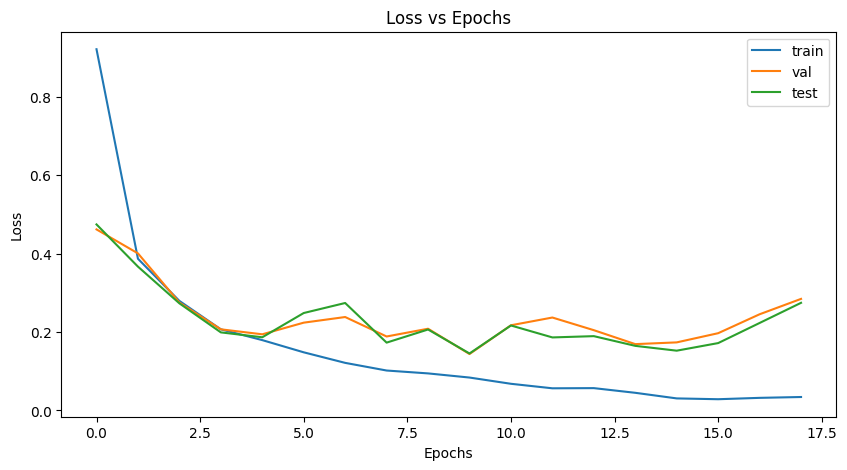

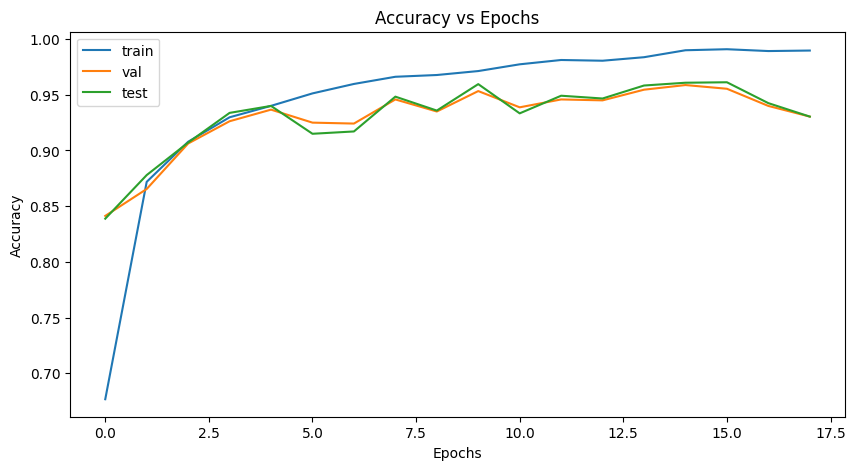

Test Accuracy: 0.9309
Test Error: 0.0691
Test Precision: 0.9309
Test Recall: 0.9309
Test F1-score: 0.9308


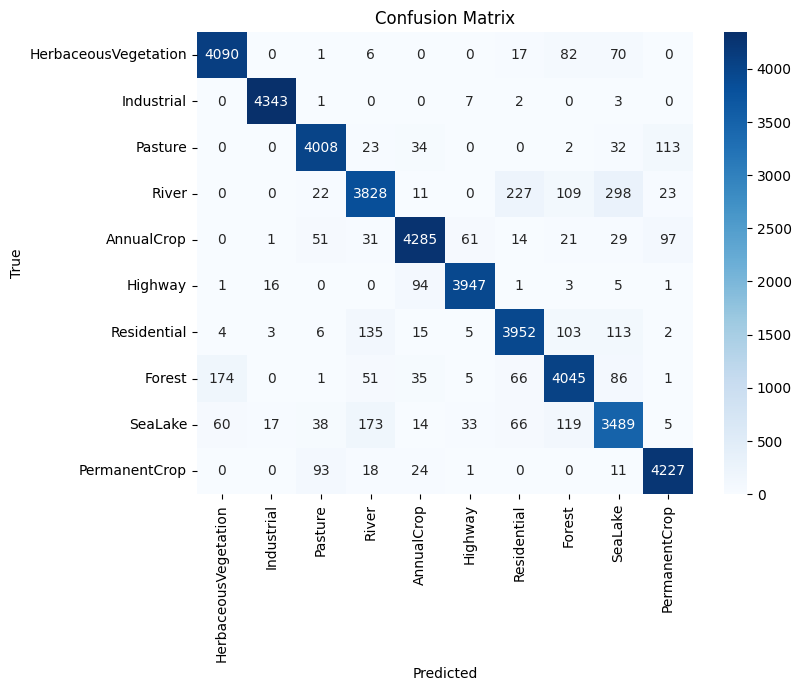

In [18]:
# Create empty lists for storing loss and accuracy for train, val, and test
train_loss = []
train_acc = []
val_loss = []
val_acc = []
test_loss = []
test_acc = []

# Create a list to store predicted and true labels for test set
pred_labels = []
true_labels = []

num_epochs = 18

# Training loop
for epoch in range(num_epochs):
    # Train the model
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0
    for i, (inputs, labels) in enumerate(training_data_loader):
        inputs = inputs.cuda()
        labels = labels.squeeze().long().cuda()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)
    train_loss.append(running_loss / len(train_set))
    train_acc.append(running_corrects.double() / total)

    # Evaluate on the validation set
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    total = 0
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_data_loader):
            inputs = inputs.cuda()
            labels = labels.squeeze().long().cuda()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
            total += labels.size(0)
    val_loss.append(running_loss / len(val_set))
    val_acc.append(running_corrects.double() / total)

    # Evaluate on the test set
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    total = 0
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_data_loader):
            inputs = inputs.cuda()
            labels = labels.squeeze().long().cuda()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
            total += labels.size(0)
            pred_labels.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    test_loss.append(running_loss / len(test_set))
    test_acc.append(running_corrects.double() / total)

    # Print epoch, loss, and accuracy for train and val sets
    print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'
          .format(epoch+1, num_epochs, train_loss[-1], train_acc[-1], val_loss[-1], val_acc[-1]))

# Plot the loss and accuracy curves for train, val, and test sets
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.plot(test_loss, label='test')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.pdf')
plt.show()

train_acc = torch.tensor(train_acc)
val_acc = torch.tensor(val_acc)
test_acc = torch.tensor(test_acc)

# Plot the loss and accuracy curves for train, val, and test sets
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.plot(test_acc, label='test')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Accuracy.pdf')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(true_labels, pred_labels)
error = 1 - accuracy
precision = precision_score(true_labels, pred_labels, average='weighted')
recall = recall_score(true_labels, pred_labels, average='weighted')
f1score = f1_score(true_labels, pred_labels, average='weighted')

print('Test Accuracy: {:.4f}'.format(accuracy))
print('Test Error: {:.4f}'.format(error))
print('Test Precision: {:.4f}'.format(precision))
print('Test Recall: {:.4f}'.format(recall))
print('Test F1-score: {:.4f}'.format(f1score))

import seaborn as sns
confusion_matrix = np.zeros((10, 10))
for i in range(len(true_labels)):
  true_idx = true_labels[i]
  pred_idx = pred_labels[i]
  confusion_matrix[true_idx][pred_idx] += 1

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['HerbaceousVegetation', 'Industrial', 'Pasture', 'River', 'AnnualCrop', 'Highway', 'Residential', 'Forest', 'SeaLake', 'PermanentCrop'], yticklabels=['HerbaceousVegetation', 'Industrial', 'Pasture', 'River', 'AnnualCrop', 'Highway', 'Residential', 'Forest', 'SeaLake', 'PermanentCrop'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.pdf')
plt.show()

# Save the trained model
torch.save(model.state_dict(), 'model.pth')

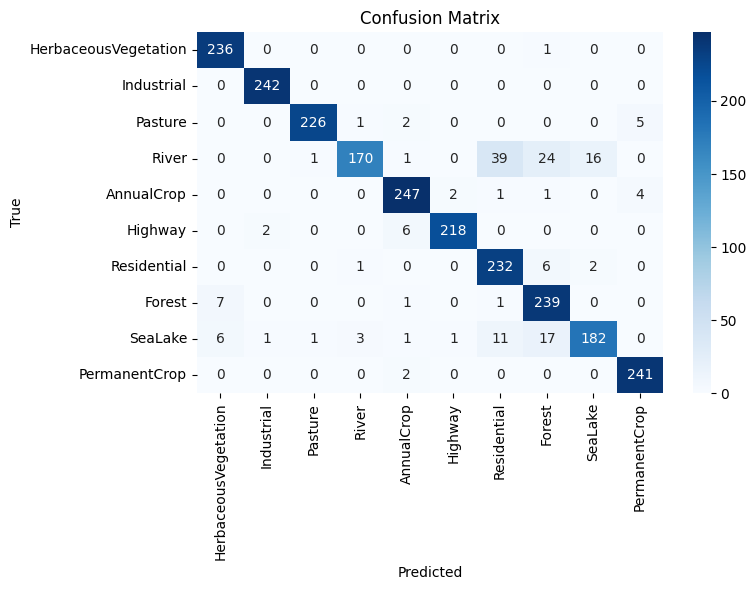

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Create empty lists to store predicted and true labels
pred_labels = []
true_labels = []

# Loop through the test set and get predictions and true labels
with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_data_loader):
        inputs = inputs.cuda()
        labels = labels.squeeze().long().cuda()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        pred_labels.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

from matplotlib.backends.backend_pdf import PdfPages

# Compute the confusion matrix
confusion_matrix = confusion_matrix(true_labels, pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['HerbaceousVegetation', 'Industrial', 'Pasture', 'River', 'AnnualCrop', 'Highway', 'Residential', 'Forest', 'SeaLake', 'PermanentCrop'], yticklabels=['HerbaceousVegetation', 'Industrial', 'Pasture', 'River', 'AnnualCrop', 'Highway', 'Residential', 'Forest', 'SeaLake', 'PermanentCrop'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()

# Save the figure to a PDF file
with PdfPages('confusion_matrix.pdf') as pdf:
    pdf.savefig(bbox_inches='tight')
    plt.show()

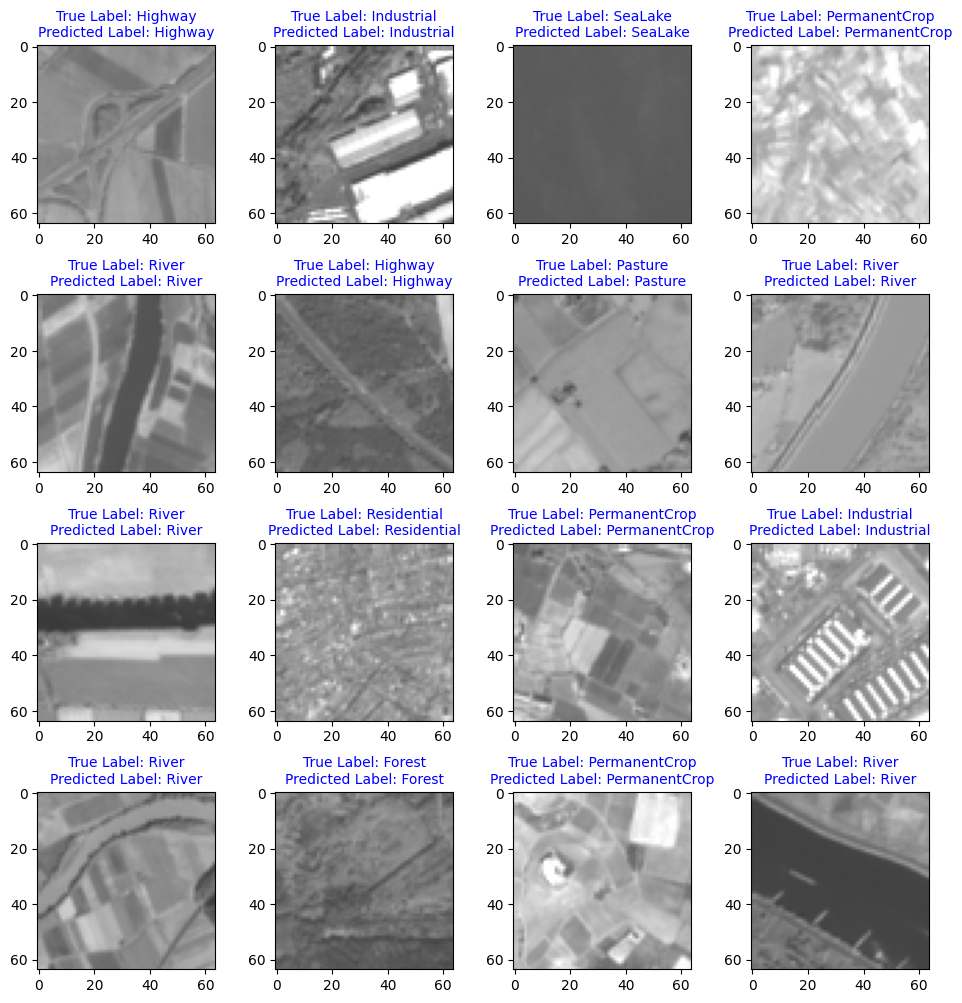

In [20]:
# Choose 16 random samples from the test set
samples = np.random.choice(len(test_set), size=16, replace=False)

# Create a 4x4 grid of subplots to display the images
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

# Evaluate the model on the chosen samples and display the images with true and predicted labels
for i, ax in enumerate(axes.flat):
    image, true_label = test_set[samples[i]]
    model.eval()
    with torch.no_grad():
        output = model(image.unsqueeze(0).cuda())
    _, predicted_label = torch.max(output.data, 1)

    # Convert the image to grayscale
    gray_img = torch.mean(image, dim=0, keepdim=True)
    plot_img = gray_img.repeat(3, 1, 1)

    # Increase the brightness of the image by a factor of 4
    plot_img = np.clip(plot_img.cpu().numpy() * 4, 0, 1)

    ax.imshow(plot_img.transpose(1, 2, 0))

    # Set title with True and Predicted labels in different colors and smaller font size
    true_label_text = 'True Label: {}'.format(classes[true_label])
    predicted_label_text = 'Predicted Label: {}'.format(classes[predicted_label])
    ax.set_title('{}\n{}'.format(true_label_text, predicted_label_text), fontsize=10, color='blue')

    ax.axis('on')

plt.subplots_adjust(wspace=0.1, hspace=0.4)
plt.savefig('Test1.pdf')
plt.show()